# Оглавление  <a class="tocSkip">

  
   1. [Обзор данных](#review1)
    
    
   2. [Предорбаботка данных](#preprocessing2)
    
    2.1 [Изменение регистра и значений](#preprocessing21)
    
      2.1.1 [Замена регистра в столбце object_name](#preprocessing211)
    
      2.1.2 [Удаление символов из значений столбца object_name](#preprocessing212)
    
      2.1.3 [Замена значений](#preprocessing213)
    
    2.2 [Выделение столбца с наименованием улицы](#preprocessing22)
    
    2.3 [Проверка на дубликаты](#preprocessing23)
    
    
   3. [Анализ данных](#analysis_type3)
    
    3.1 [Анализ соотношения видов объектов общественного питания по количеству](#analysis_type31)
    
    3.2 [Анализ соотношения сетевых и несетевых заведений по количеству](#analysis_type32)
    
    
   4. [Анализ количества посадочных мест для каждого вида объекта общественного питания](#analysis_seat4)
    
    4.1 [Что характерно для сетевых заведений: много заведений с большим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#analysis_seat41)
    
    4.2 [Cреднее количество посадочных мест для каждого вида объекта общественного питания](#analysis_seat42)
    
      4.2.1 [Общее распределение посадочных мест](#analysis_seat421)
    
      4.2.2 [Среднее количество посадочных мест для каждого вида объекта общественного питания](#analysis_seat422)
    
    
   5. [Анализ местонахождения объектов общественного питания](#location5)
    
     5.1 [Топ-10 улиц по количеству объектов общественного питания](#location51)
    
     5.2 [Улицы с одни объектом общественного питания](#location52)
    
     5.3 [Распределение количества посадочных мест](#location53)
    
       5.3.1 [для улиц с большим количеством объектов](#location531)
    
       5.3.2 [для улиц с одним объектом общественного питания](#location532)
    
    
    
  


# Исследование рынка общественного питания в Москве. <a class="tocSkip">  



## Описание проекта. <a class="tocSkip">
    
Для принятия решения об открытии кафе в Москве необходимо исследовать текущее положение дел на рынке по открытым данным о заведениях общественного питания в Москве.


###### Цель исследования :
Определить тенденции для успешного вложения в открытие кафе

###### Ход исследования

Данные о заведениях общественного питания в файле: /datasets/rest_data.csv


О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в пять этапов:
    
    
 1. Обзор данных.


 2. Предобработка данных.


 3. Анализ данных:
     
  •	Соотношение видов объектов общественного питания по количеству
    
  •	Соотношение сетевых и несетевых заведений по количеству
    
  •	Для какого вида объекта общественного питания характерно сетевое распространение?

  •	Среднее количество посадочных мест для каждого вида объекта общественного питания
    
  •	Анализ местонахождения объектов общественного питания
    

 4. Общий вывод и рекомендации.



<a id="review"></a>
# Обзор данных.

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import graph_objects as go
import datetime as dt
import numpy as np
import warnings
from io import BytesIO
import requests

In [22]:
#унифицируем размер графиков
sns.set(rc={'figure.figsize':(10, 8)})
#убираем системные предупреждения
warnings.filterwarnings('ignore')
#настраиваем отображение колонок (полностью)
pd.set_option('display.max_columns', None)
#настраиваем отображение формата значений
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#открываем и сохраняем как датафрейм файл с данными:
try:
    # personal path
    df = pd.read_csv('rest_data.csv')
except:
    # Yandex path
    df = pd.read_csv('/datasets/rest_data.csv')


Для удобства зададим несколько функций:

In [5]:
#функция для вывода состава столбцов
def describe_cols(df_data):
    df = df_data
    values = pd.DataFrame()

    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]

    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)


#функция для вывода пустых значений и их доли в столбцах датафрейма
def nan_values(df_data):
    df = df_data
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)

    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing})

    return missing_value_df


#функция для вывода информации о файле
def df_info (df_data):
    print('Количество строк файла:', len(df_data))
    print()
    print('Информация о содержимом файла:')
    display(describe_cols(df_data))
    print()
    print('Информация о пропусках данных:')
    display(nan_values(df_data))
    print()
    print('Первые пять строк таблицы:')
    display(df_data.head())

#просмотр данных столбца: уникальные значения, тип данных, кол-во пропусков
def preprocessing(column):
    #print(column, '-', dict_name[column])
    print('тип данных', df[column].dtypes)
    print('количество пропусков',df[column].isna().sum())
    if df[column].dtypes != 'object':
        print('минимальное значение:',df[column].min(), 'максимальное значение:', df[column].max() )
    print('уникальные значения:', '\n', df[column].value_counts())


Рассмотрим подробнее содержимое файла:

In [6]:
df_info(df)

Количество строк файла: 15366

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
id,"[151635, 77874, 24309, 21894, 119365, 27429, 1...",int64,15366
number,"[48, 35, 95, 40, 50, 240, 10, 90, 150, 120, 5,...",int64,315
object_name,"[СМЕТАНА, Родник, Кафе «Академия», ПИЦЦЕТОРИЯ,...",object,10393
chain,"[нет, да]",object,2
object_type,"[кафе, столовая, закусочная, предприятие быстр...",object,9
address,"[город Москва, улица Егора Абакумова, дом 9, г...",object,9108



Информация о пропусках данных:


,column_name,num_missing,percent_missing
id,id,0,0.00
object_name,object_name,0,0.00
chain,chain,0,0.00
object_type,object_type,0,0.00
address,address,0,0.00
number,number,0,0.00



Первые пять строк таблицы:


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


**столбец id**

In [7]:
preprocessing('id')

тип данных int64
количество пропусков 0
минимальное значение: 838 максимальное значение: 223439
уникальные значения: 
 id
222535    1
151635    1
77874     1
24309     1
21894     1
         ..
148595    1
28858     1
20958     1
20957     1
148815    1
Name: count, Length: 15366, dtype: int64


**Вывод**

В столбце- уникальные id предприятий, количество соответствует количеству строк, дубликатов нет

**Столбец object_name**

In [8]:
preprocessing('object_name')

тип данных object
количество пропусков 0
уникальные значения: 
 object_name
Столовая                    267
Кафе                        236
Шаурма                      234
KFC                         155
Шоколадница                 142
                           ... 
ДОДО пицца                    1
Мята lounge                   1
Лаундж-бар «Мята Lounge»      1
Бар Мята Lounge               1
Мята Lounge Октябрьская       1
Name: count, Length: 10393, dtype: int64


**Вывод**

Данные содержат наименование точки общепита. Для дальнейшей работы с данными и исключения неявных дубликатов есть смысл перевести наименования в нижний регистр и удалить символы ',', '«', '»', '(', ')', '"', '  '

**Столбец chain**

In [9]:
preprocessing('chain')

тип данных object
количество пропусков 0
уникальные значения: 
 chain
нет    12398
да      2968
Name: count, dtype: int64


**Вывод**

Столбец содержит информацию о принадлежности точки к сетевой. Заменим "да" и "нет" на "сетевая" и "несетевая"

**Столбец object_type**

In [10]:
preprocessing('object_type')

тип данных object
количество пропусков 0
уникальные значения: 
 object_type
кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: count, dtype: int64


**Вывод**

В столбце - информация о типе предприятия общепита. Заменим 'предприятие быстрого обслуживания' на 'фастфуд', 'магазин (отдел кулинарии)' на 'кулинария'

**Столбец address**

In [11]:
preprocessing('address')

тип данных object
количество пропусков 0
уникальные значения: 
 address
город Москва, Ходынский бульвар, дом 4               95
город Москва, Пресненская набережная, дом 2          63
город Москва, проспект Мира, дом 211, корпус 2       60
город Москва, Кировоградская улица, дом 13А          53
город Москва, площадь Киевского Вокзала, дом 2       48
                                                     ..
город Москва, переулок Васнецова, дом 2               1
город Москва, Большая Переяславская улица, дом 8А     1
город Москва, проспект Мира, дом 50                   1
город Москва, Трифоновская улица, дом 31А             1
город Москва, Староалексеевская улица, дом 1          1
Name: count, Length: 9108, dtype: int64


**Вывод**

Столбец с адресом пищевой точки. Для анализа необходимо выделить столбец с наименованием улицы.

**Столбец number**

In [12]:
preprocessing('number')

тип данных int64
количество пропусков 0
минимальное значение: 0 максимальное значение: 1700
уникальные значения: 
 number
0      1621
40      835
20      727
30      685
10      644
       ... 
700       1
295       1
268       1
212       1
119       1
Name: count, Length: 315, dtype: int64


In [13]:
df['number'].describe()

,number
count,"15,366.00"
mean,59.55
std,74.74
min,0.00
25%,12.00
50%,40.00
75%,80.00
max,"1,700.00"


**Вывод**

В столбце -количество посадочных мест. Мы видим 1621 точку, в которой они отсутствуют. Оставим их как вариант мелких бистро/шаурмячных на улице. Максимальное значение в 1700 мест также имеет место на существование (крупные несетевые заведения в виде столовой, бара в ночном клубе).

**Вывод по разделу 1**

В представленном для анализа файле 15366 строк с данными об уникальных точках общественного питания.

Таблица rest_data содержит 6 столбцов:

 - id — идентификатор объекта;
 - object_name — название объекта общественного питания;
 - chain — сетевой ресторан
 - object_type — тип объекта общественного питания;
 - address — адрес;
 - number — количество посадочных мест.

Несоответствие типов данных содержимому не выявлено, пропуски отсутствуют.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез.

На этапе предобработки внесем следующие изменения:

- object_name - Данные содержат наименование точки общепита. Для дальнейшей работы с данными и исключения неявных дубликатов есть смысл перевести наименования в нижний регистр и удалить символы ',', '«', '»', '(', ')', '"', ' '

- object_type -Заменим 'предприятие быстрого обслуживания' на 'фастфуд', 'магазин (отдел кулинарии)' на 'кулинария'

- chain - Столбец содержит информацию о принадлежности точки к сетевой. Заменим "да" и "нет" на "сетевая" и "несетевая"

- проверим столбец object_name на скрытые дубликаты, и при необходимости приведем наименования сетевых предприятий к единому наименованию

- добавим столбец с наименованием улицы, которое вычленим из столбца address

А также проверим данные на дубликаты.

<a id="preprocessing"></a>
#  Предобработка данных  

<a id="preprocessing21"></a>
## Изменение регистра и значений

<a id="preprocessing211"></a>
### Замена регистра в столбце object_name

In [14]:
df['object_name'] = df['object_name'].str.lower()
df['object_name'].unique()

array(['сметана', 'родник', 'кафе «академия»', ..., 'бар мята lounge',
       'мята lounge октябрьская', 'кальянная «мята lounge»'], dtype=object)

**Вывод**

Произведена замена регистра в столбце  object_name

<a id="preprocessing212"></a>
### Удаление символов из наименований значений столбца object_name ',', '«', '»', '(', ')', '"', '  '**

In [15]:
symbols = [',', '«', '»', '(', ')', '"', '  ']
for s in symbols:
    df['object_name'] = df['object_name'].str.replace(s, ' ')


list(sorted(df['object_name'].unique()))

[' 2 2 паб',
 ' амега раздаточный буфет 2-го автобусного парка',
 ' би-ба-бо боулинг центр',
 ' гама-сервис ',
 ' гбоу школа с углубленным изучением английского языка №1208 ',
 ' иzюм дагестанская кухня',
 ' ип мураховский и.ф',
 ' ип рушева т.с',
 ' ип шацкая е.м',
 ' кафе кулинарная лавка братьев караваевых ',
 ' московский комбинат шампанских вин ',
 ' снек бар в кинотеатре космик ',
 '1-й мок',
 '1-ый московский кадетский корпус',
 '100 личная столовая',
 '100 личное кафе',
 '1001 ночь',
 '100лоффка',
 '101 вкус',
 '13 rules',
 '13 rules kraft beer',
 '15 kitchen+bar',
 '18 автобусный парк',
 '19bar atmosphere',
 '1x bet',
 '2-й автобусный парк',
 "23'00",
 '24 градуса',
 '259',
 '3 skovorodki',
 '3 правила',
 '33 пингвина',
 '37-37',
 '44 чашма',
 '495',
 '5звезд юг 52',
 '68. пауза',
 '69 pints',
 '69 pints бар',
 '7 злаков',
 '7 сендвичей',
 '7 сэндвичей-meating',
 '7717 lounge кальянная ',
 '8 oz унций',
 '8-ой троллейбусный парк',
 '9 автобусный парк',
 '9bar',
 'abbey players

**Вывод**

Для дальнейшей работы со скрытыми дцбликатами удалены символы из наименований значений столбца object_name

<a id="preprocessing213"></a>
### Замена значений

#### Замена значений в столбцах chain и object_type

In [16]:
#заменим 'нет' и 'да' на 'несетевое' и 'сетевое'
df['chain'] = df['chain'].map({'нет':'несетевое','да':'сетевое'})
df['chain'].unique()

array(['несетевое', 'сетевое'], dtype=object)

In [ ]:
#заменим предприятие быстрого обслуживания' на 'фастфуд, 'магазин (отдел кулинарии)' на 'кулинария'
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фастфуд')
df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная', 'фастфуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'кулинария'], dtype=object)

**Вывод**

Для удобства в дальнейшем анализе произведена замена значений в столбцах chain ("да" и "нет" на 'несетевое' и 'сетевое') и object_type ('предприятие быстрого обслуживания' на 'фастфуд', 'магазин (отдел кулинарии)' на 'кулинария')

#### Удаление скрытых дубликатов в столбце object_name

Приведем скрытые дубликаты наименований крупнейших сетей к единому наименованию:

In [18]:
#предварительная оценка поиска
df.query('chain == "сетевое"').groupby('object_name')\
        .agg({'id':'count'}).sort_values(by='id',ascending=False).head(10)

,id
object_name,
шоколадница,157
kfc,155
макдоналдс,151
бургер кинг,137
теремок,94
крошка картошка,90
домино'с пицца,90
суши wok,72
милти,72


In [19]:
#код для текущего нахождения дубликатов - для понимания процесса их поиска
#df.query('chain == "сетевое"')[df['object_name'].str.contains('джонс')]['object_name'].value_counts()

In [20]:
#замена синонимов на стандартное название сети
print('количество уникальных значений до категоризации:', len(df.query('chain == "сетевое"')['object_name'].unique()))

#словарь для замены значений
replace_name ={'mcdonalds' : [
                    'ресторан макдоналдс ' , 'макдоналдс', 'предприятие быстрого обслуживания макдоналдс',
                    'кафе макдоналдс ', 'кафе макдоналдс', 'москва - макдоналдс',
                    'предприятие быстрого обслуживания макдоналдс '
                    ],
              'kfc': [
                   'fridays kfc', 'ростикс kfc','ресторан kfc ','ресторан kfc',
                    'предприятие быстрого обслуживания kfc ',
                    'ресторан быстрого питания kfc', 'КФЦ',
                    'закусочная kfc ', 'закусочная kfc','kfc волгоградский',
                    'пбо kfc покрышкина ', 'пбо kfc ', 'кафе kfc ', 'кафе kfc',
                    'kfc.', 'fridays kfc'
                    ],
               'starbucks': [
                    'старбакс starbucks', 'starbucks старбакс', 'кафе starbucks', 'starbucks coffee',
                    'кофемания starbucks', 'starbucks кофе', 'кафе starbucks ',
                    'starbucks старбакс кофе', 'кафе старбакс ', 'кафе сабвей старбакс',
                    'кофейня старбакс кофе ', 'кафе кофейня старбакс ',
                    'кофейня старбакс ', 'кофейня старбакс','старбакс кофе',
                    'старбакс'
                    ],
               'шоколадница': [
                    'кафе шоколадница', 'кофейня шоколадница ', 'кофейня шоколадница',
                    'шоколадница экспресс'
                    ],
               'burger king': [
                    'бургер кинг','бургер кинг burger king', 'предприятие быстрого обслуживания бургер кинг ',
                    'кафе бургер кинг ',   'кафе бургер кинг', 'ресторан бургер кинг ',
                    'закусочная бургер кинг ', 'кафе-закусочная бургер кинг ', 'burgerking'
                    ],
               'dominos pizza': [
                   'domino-s pizza', 'домино\'с пицца', 'domino s pizza'
                   'домино\'с пицца', 'пиццерия домино\'с пицца ' ,
                   'предприятие быстрого обслуживания домино\'с пицца ',
                   'доминос пицца', 'ресторан домино\'с пицца ',
                   'кафе домино\'с пицца '
                   ],
               'крошка картошка': [
                   'кафе крошка картошка', 'предприятие быстрого обслуживания крошка картошка ',
                   'кафе крошка-картошка ','кафе крошка картошка ',  'закусочная крошка картошка ',
                   'крошкакартошка',  'крошка-картошка',
                   'ресторан быстрого питания крошка картошка ',
                   'предприятие быстрого питания крошка картошка '
                   ],
               'теремок': ['кафе теремок ', 'предприятие быстрого обслуживания теремок ',
                   'ресторан теремок ', 'кафе теремок' , 'пбо теремок ', 'закусочная теремок '
                   ],
               'милти': ['магазин готовой еды милти ', 'предприятие быстрого обслуживания милти ',
                   'точка продажи готовой еды милти', 'готовые блюда милти'
                   ],
                'суши wok':['кафе суши wok', 'кафе суши wok', 'сеть магазинов суши wok ',
                    'кафе суши wok', 'бар суши wok '],
               'папа джонс': ['пиццерия папа джонс ', 'пиццерия папа джонс',
                    'кафе папа джонс ', 'папа джонс пицца', 'пицерия папа джонс '
                   ],
               'додо пицца': ['пиццерия додо пицца ','предприятие быстрого обслуживания додо пицца '],
               'якитория': ['кафе якитория' , 'ресторан якитория ', 'якитория и ян примус',
                      'кафе якитория ', 'якитория и спорт бар'],
               'тануки': ['ресторан тануки ' , 'ресторан тануки ', 'кафе тануки '],
               'subway': ['кафе subway' , 'сабвей subway']
              }
#функция для замены значений в object_name:
def check_replace(cell):
    for key, value in replace_name.items():
        if cell in value: return key
    return cell

#применим функцию check_replace к стролбцу object_name для приведения к единому наименованию сетевых предприятий
df['object_name'] = df['object_name'].apply(check_replace)


количество уникальных значений до категоризации: 573


Проверим результат:

In [21]:
#результат категоризации наименований:
sorted(df.query('chain == "сетевое"')['object_name'].unique())

print('количество уникальных значений после категоризации:', len(df.query('chain == "сетевое"')['object_name'].unique()))

количество уникальных значений после категоризации: 494


Таким образом, (заходя вперед) топ-10 сетевых брендов пищевого питания в Москве в зависимости от количества пищевых точек выглядят так:

In [23]:
df.query('chain == "сетевое"').groupby('object_name').agg({'id':'count'}).sort_values(by='id',ascending=False)\
                              .rename(columns=({'id': 'count'})).head(10)

,count
object_name,
kfc,188
mcdonalds,173
шоколадница,167
burger king,159
теремок,109
dominos pizza,98
крошка картошка,96
милти,81
суши wok,75


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

**Вывод**

Для корректности дальнейших группировок наименования объектов крупных сетей приведены к общепринятому универсальному названию, благодаря чему количество уникальных наименований в сетевом сегменте рынка сократилось с 573 до 494.

<a id="preprocessing22"></a>
## Выделение столбца с наименованием улицы

В анализе нам понадобится систематизация объектов общественного питания по местонахождению. Для этого выделим из адреса каждой точки наименование улицы:

In [24]:
#применим split() для разделения текста на список и выделим из него улицу
df['streetname'] = df['address'].apply(lambda x: x.split(',')[1])
#обрежем возможные пробелы с обоих сторон
df['streetname'] = df['streetname'].str.strip()

df['streetname'].head()

,streetname
0,улица Егора Абакумова
1,улица Талалихина
2,Абельмановская улица
3,Абрамцевская улица
4,Абрамцевская улица


In [25]:
df['streetname'].value_counts().head()

,count
streetname,
город Зеленоград,232
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,171
Пресненская набережная,167


**Вывод**

Наименования улиц выделены в отдельный столбец. Поскольку в дальнейшем данная информация нам нужна для поиска топ-улиц с наибольшим количеством точек, отдельно выделенный город Зеленоград по количеству точек на улице не попадет в эту выборку, и им можно будет пренебречь.

<a id="preprocessing23"></a>
## Проверка данных на дубликаты

In [26]:
df.duplicated().sum()

np.int64(0)

Количество дубликатов без  уникального id:

In [27]:
df.drop(columns='id').duplicated().sum()

np.int64(85)

In [28]:
df[df.drop(columns='id').duplicated()]

,id,object_name,chain,object_type,address,number,streetname
2381,28611,комбинат питания мгту им.н.э.баумана,несетевое,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100,2-я Бауманская улица
3397,71896,буфет коникс-школьник,несетевое,буфет,"город Москва, улица Удальцова, дом 21",100,улица Удальцова
3481,20914,буфет мади,несетевое,буфет,"город Москва, Ленинградский проспект, дом 64",40,Ленинградский проспект
4431,23759,столовая гбоу города москвы № 384,несетевое,буфет,"город Москва, Беловежская улица, дом 67",100,Беловежская улица
4537,23391,столовая комбинат питания космос,несетевое,столовая,"город Москва, Новозаводская улица, дом 12/11",15,Новозаводская улица
...,...,...,...,...,...,...,...
14578,222932,старый баку,несетевое,кафе,"город Москва, Кировоградская улица, владение 15А",120,Кировоградская улица
14596,204947,буфет при кинотеатре,несетевое,буфет,"город Москва, Ореховый бульвар, дом 22А",0,Ореховый бульвар
14844,219518,sushi-make,несетевое,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0,Ярцевская улица
15173,218542,кофе с собой,сетевое,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0,Алтуфьевское шоссе


 Мы видим 85 возможных дубликатов. Но в одном торговом центре может быть несколько сетевых кафе, а в одном учебном заведении-несколько буфетов на разных этажах либо в разых частях здания. Будем считать, что это отдельные объекты общепита.

**Вывод**

Дубликаты отсутствуют.

**Вывод по разделу 2**

На этапе предобработки внесены следующие изменения:


1. Произведена замена данных:

 - данные столбца object_name для дальнейшей работы со скрытыми дубликатами приведены в нижний регистр и  и удалили символы ',', '«', '»', '(', ')', '"', ' '
 - в данных столбца object_type заменили значения 'предприятие быстрого обслуживания' на 'фастфуд', 'магазин (отдел кулинарии)' на 'кулинария'

 - в столбце chain - заменены данные  "да" и "нет" на "сетевая" и "несетевая"


2. Удалены скрытые дубликаты в наименованиях крупнейших сетевых предприятий (заменены на на стандартное название сети)


3. Выделен отдельно столбец с наименованием улицы местонахождения точки.


Дубликаты отсутствуют.
Данные готовы к анализу.

<a id="analysis_type3"></a>
# Анализ данных

Для определения общих тенденций, которые необходимо учесть для принятия решения об открытии кафе,  рассмотрим объекты общественного питания  в разрезе видов, принадлежности к сети, посадочных мест и местонахождения.

<a id="analysis_type31"></a>
## Анализ соотношения видов объектов общественного питания по количеству



Сгруппируем объекты по типу, посчитаем их количество и визуализируем результат:

In [29]:
#сгруппируем датасет по признаку object_type
object_type_count= (df.groupby(['object_type'])
                    .agg({'object_type':'count'})
                    .rename(columns={'object_type':'object_type_count'})
                    .sort_values(by='object_type_count', ascending=False)
                   )
object_type_count = object_type_count.reset_index()
display(object_type_count)

#построим круговую диаграмму
layout=go.Layout(
    title='График соотношения типов объектов общественного питания'
)
fig = go.Figure(data=[go.Pie(labels=object_type_count['object_type'], values=object_type_count['object_type_count'])], layout=layout)

fig.show()

,object_type,object_type_count
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


**Вывод**


В Москве 15366 объектов общественного питания. Наибольшее количество из них имеет формат кафе (39.7%), на втором месте (доли по 17-12%) приходится на столовые, рестораны и фастфуд.

<a id="analysis_type32"></a>
## Анализ соотношения сетевых и несетевых заведений по количеству


Посмотрим общее соотношение количетва сетевых и несетевых объектов общественного питания:

In [30]:
#сгруппируем датасет по признаку 'chain'
chain_count= (df.groupby(['chain'])
                    .agg({'chain':'count'})
                    .rename(columns={'chain':'chain_count'})
                    .sort_values(by='chain_count', ascending=False)
                   )
chain_count = chain_count.reset_index()
display(chain_count)

##построим круговую диаграмму
layout=go.Layout(
    title='Доли сетевых и несетевых типов объектов общественного питания'
)
fig = go.Figure(data=[go.Pie(labels=chain_count['chain'], values=chain_count['chain_count'])],  layout=layout)

fig.show()

,chain,chain_count
0,несетевое,12398
1,сетевое,2968


Подавляющее большинство объектов имеют несетевой характер. К сетевым можно отнести только 19.3% заведений общепита.

Посмотрим распределение сетевых и несетевых объектов по типам заведений:

In [31]:
#сгруппируем данные по типу объекта и признаку сетевой/несетевой
#и подсчитаем количество и процент сетевых заведений внутри каждой категории:
object_type_chain= (df.groupby([ 'object_type', 'chain'])
                    .agg({'object_type':'count','number':'mean'})
                    .rename(columns={'object_type':'object_type_count', 'number':'number_mean'})
                    .sort_values(by=['chain','object_type_count'], ascending=False)
                   )
object_type_chain.reset_index(inplace=True)
object_type_chain['percent_of_object_name'] = (
                              object_type_chain['object_type_count']
                              /object_type_chain.groupby('object_type')['object_type_count'].transform('sum')
                               )
display(object_type_chain)

,object_type,chain,object_type_count,number_mean,percent_of_object_name
0,кафе,сетевое,1396,47.43,0.23
1,предприятие быстрого обслуживания,сетевое,791,40.17,0.41
2,ресторан,сетевое,544,100.23,0.24
3,магазин (отдел кулинарии),сетевое,78,8.68,0.29
4,закусочная,сетевое,56,14.38,0.16
5,кафетерий,сетевое,52,12.27,0.13
6,бар,сетевое,37,53.03,0.04
7,буфет,сетевое,11,12.73,0.02
8,столовая,сетевое,3,112.33,0.00
9,кафе,несетевое,4703,37.43,0.77


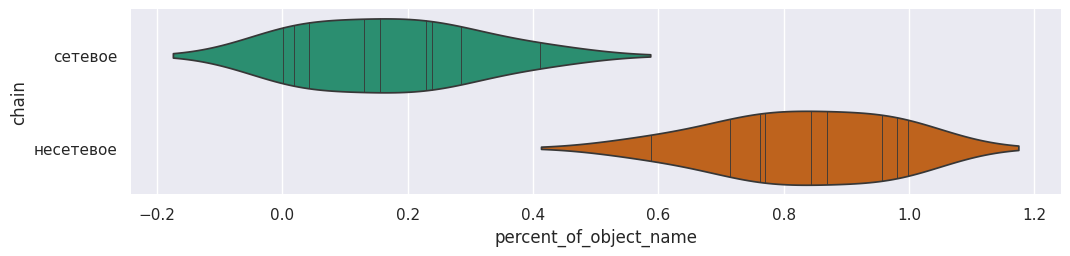

In [59]:
# @title chain vs percent_of_object_name

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(object_type_chain['chain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(object_type_chain, x='percent_of_object_name', y='chain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Выведем общее количественное распределение сетевых и несетевых объектов:

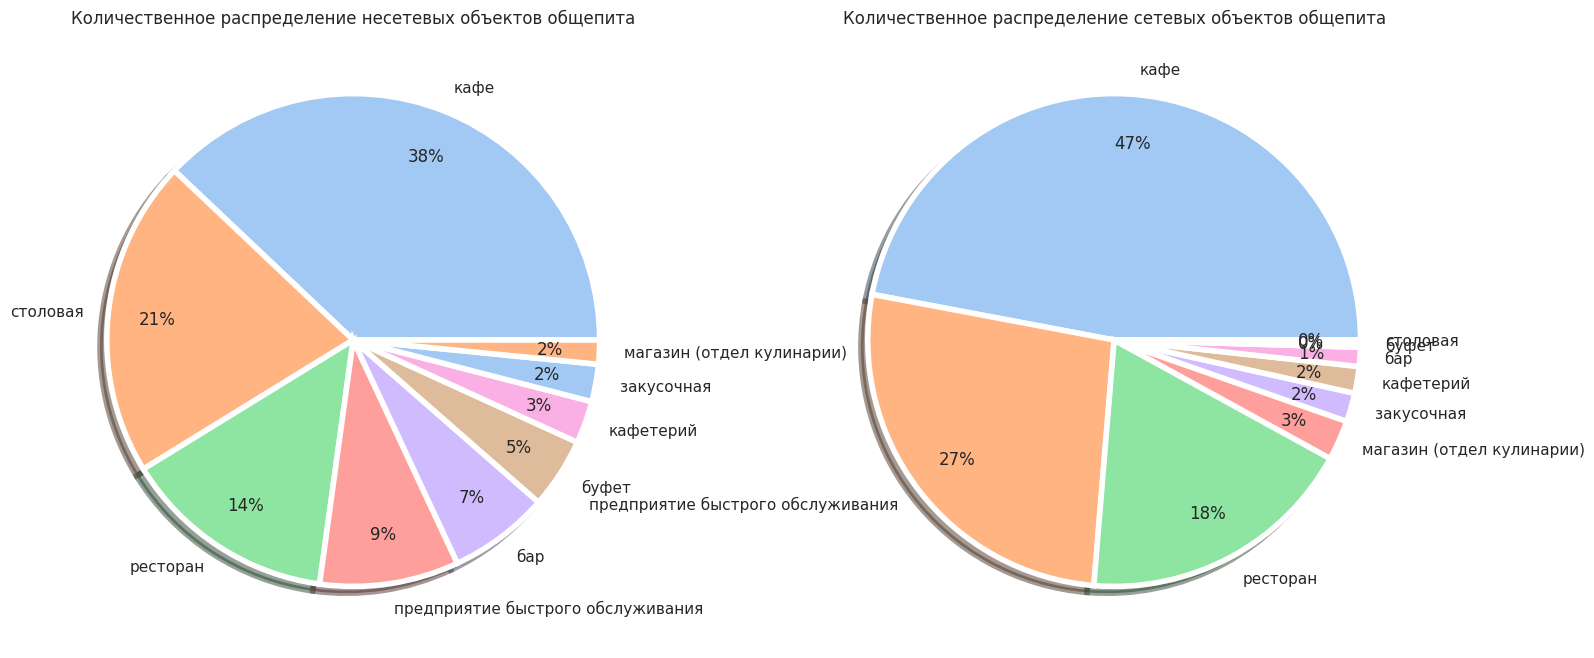

In [32]:
# Настройка цветовой гаммы
colors = sns.color_palette('pastel')[0:7]


plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)
data = object_type_chain.query('chain == "несетевое"')['object_type_count']
labels = object_type_chain.query('chain == "несетевое"')['object_type']
# Рендеринг круговой диаграммы
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', shadow=True, pctdistance=0.8, wedgeprops = {'linewidth': 4})
plt.title('Количественное распределение несетевых объектов общепита')

plt.subplot(1, 2, 2)
data = object_type_chain.query('chain == "сетевое"')['object_type_count']
labels = object_type_chain.query('chain == "сетевое"')['object_type']
# Рендеринг круговой диаграммы
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', shadow=True, pctdistance=0.8,wedgeprops = {'linewidth': 4}
)
plt.title('Количественное распределение сетевых объектов общепита')
plt.show()

В несетевых объектах значительная доля кафе (38%), столовых (21%) и ресторанов.

В сетевых почти половину занимают кафе (47%), фастфуд(27%) и рестораны(18%).

Такое распределение вызвано отчасти большим количеством кафе (почти 40% всего рынка), и столовых (почти 17% рынка, при этом столовые- только несетевые заведения). В остальном- это различные соотношения сетевых/несетевых объектов внутри каждой категории.

Чтобы посмотреть на эти соотношения долей внутри категорий, построим сравнительную столбчатую диаграмму сетевых и несетевых заведений внутри каждого вида заведений общественного питания:

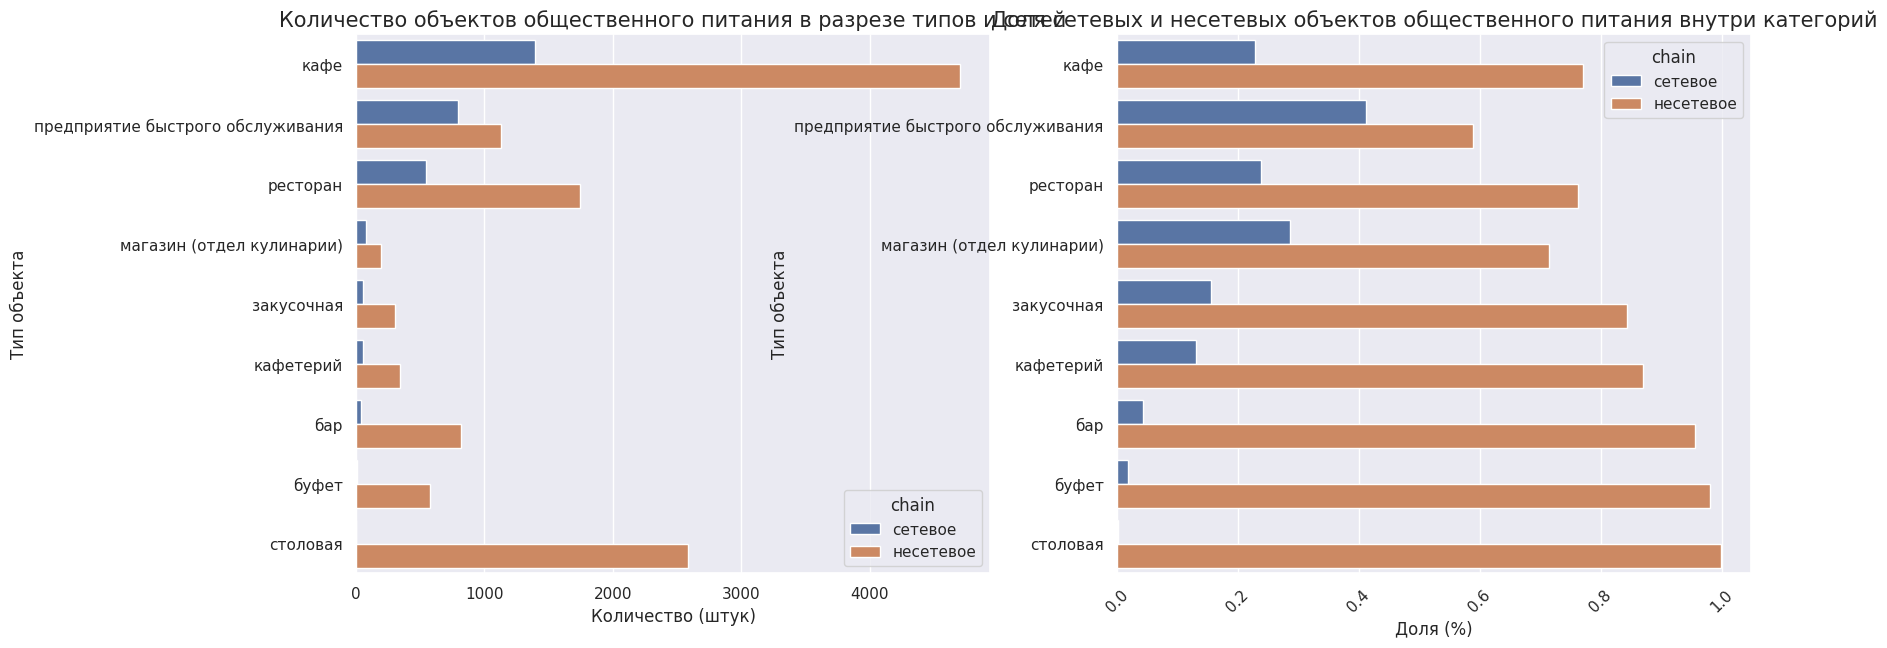

In [33]:
plt.figure(figsize=(18,7))

#график количественного соотношения
plt.subplot(1, 2, 1)
#примечание: поскольку мы строим диаграмму по сводным данным, значение estimator в данном случае не играет никакой роли
ax = sns.barplot(y='object_type', x='object_type_count',hue='chain' ,data=object_type_chain)
ax.set_xlabel('Количество (штук)')
ax.set_ylabel('Тип объекта')
ax.set_title('Количество объектов общественного питания в разрезе типов и сетей', fontsize = 15)


#график процентного соотношения
plt.subplot(1, 2, 2)
ax = sns.barplot(y='object_type', x='percent_of_object_name',hue='chain' ,data=object_type_chain)
ax.set_xlabel('Доля (%)')
ax.set_ylabel('Тип объекта')
ax.set_title('Доля сетевых и несетевых объектов общественного питания внутри категорий', fontsize = 15)
plt.xticks(rotation=45)

plt.show()



Наибольшее количество сетевых заведений -это кафе, фастфуд и рестораны. Но если мы посмотрим на процентное соотношение, то заметим, что наибольшая пропорция сетевых заведений - в категории фастфуд (41%), кулинария (29%), рестораны (24%) и кафе (23%). В категории столовая, которая находится на втором месте по распространенности, практически нет сетевых заведений (их всего 3 шт).

**Вывод**

Подавляющее большинство объектов имеют несетевой характер. К сетевым можно отнести только 19.3% заведений общепита.

В несетевых объектах значительная доля кафе (38%), столовых (21%) и ресторанов.

В сетевых почти половину занимают кафе (47%), фастфуд(27%) и рестораны(18%).

Такое распределение вызвано отчасти большим количеством кафе (почти 40% всего рынка), и столовых (почти 17% рынка, при этом столовые- только несетевые заведения). В остальном- это различные соотношения сетевых/несетевых объектов внутри каждой категории. Так, 41% фастфуда, 29% кулинарии, 24% ресторанов и 23% кафе- сетевые.

В категории столовая, которая находится на втором месте по распространенности, практически отсутствуют сетевые заведения (их всего 3).

<a id="analysis_seat4"></a>
#  Анализ количества посадочных мест для каждого вида объекта общественного питания



<a id="analysis_seat41"></a>
## Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Разделим все сетевые заведения на категории по количеству заведений в сети и по количеству посадочных мест.

Предположим, что:

- "мало" сетевых заведений -до 5 включительно, "много"- более 5 заведений в сети;
- "мало" мест -до 20 посадочных мест включительно, "много" - более 20 посадочных мест (5-7 столиков по 2-4 человека - вполне подходит под описание "маленького кафе")

Сгруппируем данные по сетевым заведениям в соответствии с нашими критериями и построим диаграмму разброса:

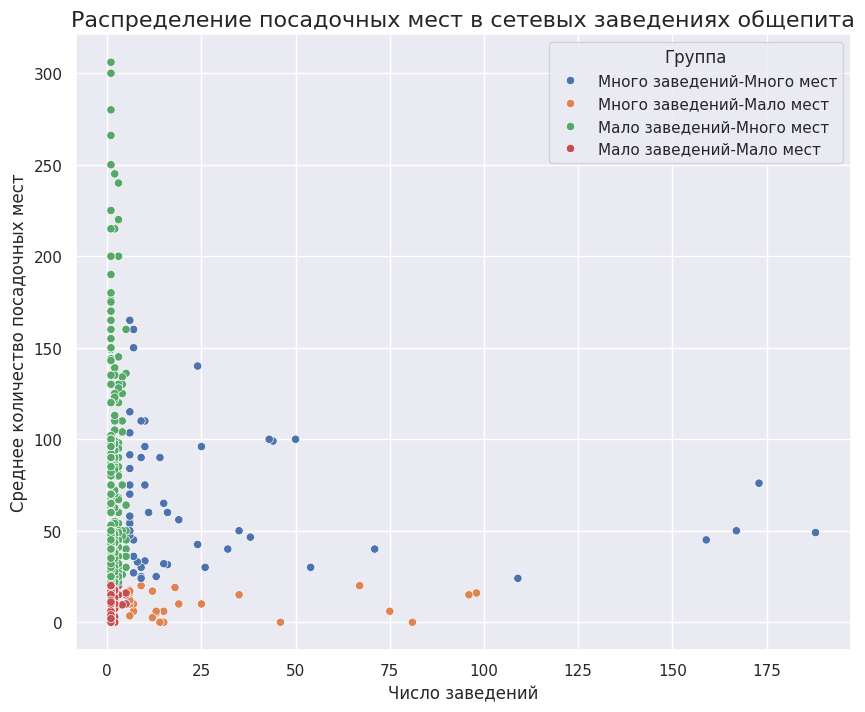

In [34]:
chains=df.query('chain == "сетевое"').groupby('object_name').agg({'id':'count', 'number':'median'})\
                                     .sort_values(by='id', ascending=False)
chains.head()

#много -это > 5 заведений в сети
chains['rest_num_group'] = 'Мало заведений'
chains.loc[chains['id']>5, 'rest_num_group'] = 'Много заведений'

#много- это > 30 средних посадочных мест
chains['seat_num_group'] = 'Мало мест'
chains.loc[chains['number']>20, 'seat_num_group'] = 'Много мест'

chains['Группа'] = chains['rest_num_group'].astype(str) + '-' + chains['seat_num_group'].astype(str)


ax = sns.scatterplot(data=chains, x='id', y='number', hue='Группа')

plt.xlabel('Число заведений'), plt.ylabel('Среднее количество посадочных мест')
plt.title('Распределение посадочных мест в сетевых заведениях общепита', fontsize = 16)
plt.show()


На диаграмме разброса хорошо видна самая многочисленная категория сетевых заведений: это небольшие сети (до 5 объектов) с количеством мест более 20. При этом мы видим максимальную концентрацию кафе в диапазоне 40-70 посадочных мест.

**Вывод**

Самая многочисленная категория для сетевых заведений - это сеть с небольшим количеством заведений и количеством посадочных мест более 20 и выше

<a id="analysis_seat42"></a>
##  Cреднее количество посадочных мест для каждого вида объекта общественного питания

<a id="analysis_seat421"></a>
### Общее распределение посадочных мест

Сначала посмотрим на общую картину с посадочными местами:

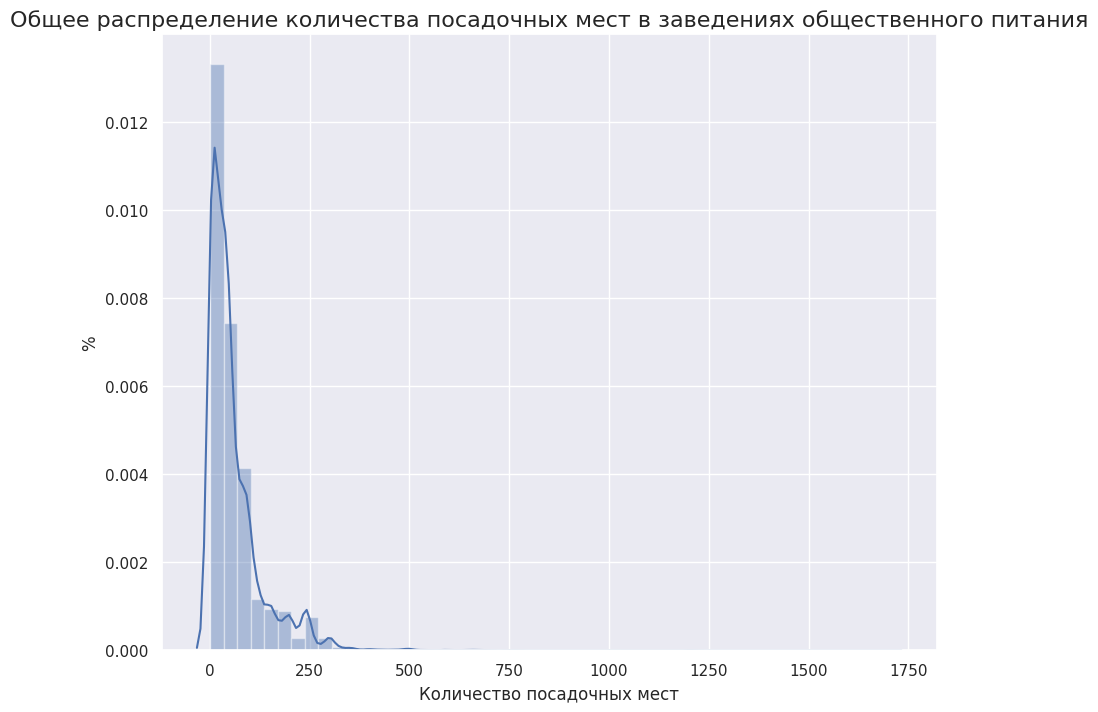

In [35]:
#график общего распределения мест
#plt.subplot(1, 2, 1)
ax = sns.distplot(df['number'],bins=50)
ax.set_xlabel('Количество посадочных мест')
ax.set_ylabel('%')
ax.set_title('Общее распределение количества посадочных мест в заведениях общественного питания', fontsize = 16)

plt.show()

**Вывод**

Наиболее распространены заведения с количеством посадочных мест от 0 до 300, с явно выраженным пиком в области от 0 (уличные заведения с едой только на вынос) до 100 мест.

<a id="analysis_seat422"></a>
### Среднее количество посадочных мест для каждого вида объекта общественного питания

Посмотрим как распределяется среднее количество посадочных мест в разрезе типов заведений:

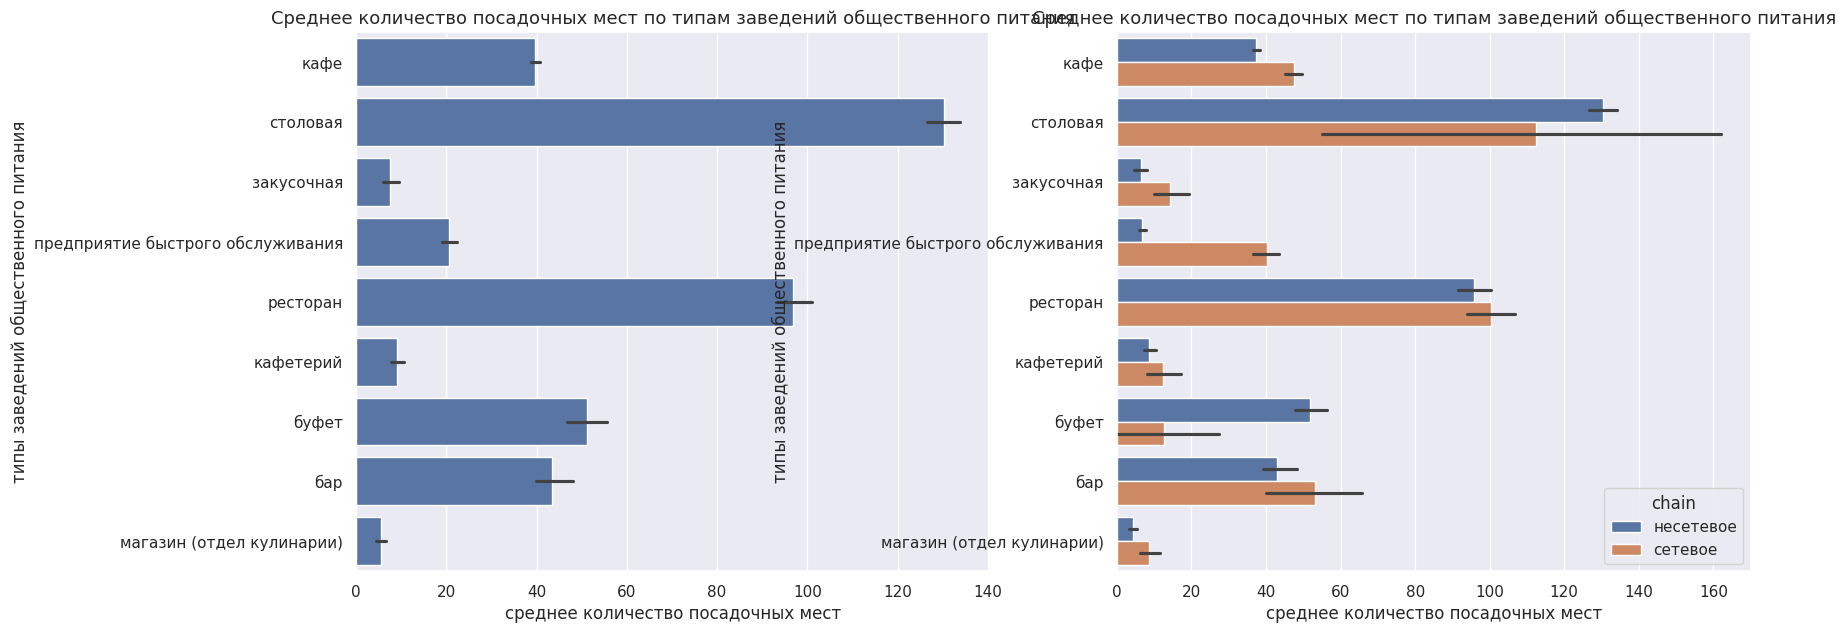

In [36]:
plt.figure(figsize=(18,7))

#график соотношения среднего количества посадочных мест по видам заведений в целом
plt.subplot(1, 2, 1)
ax = sns.barplot(y ='object_type', x='number', data= df, estimator=np.mean)
ax.set_xlabel('среднее количество посадочных мест')
ax.set_ylabel('типы заведений общественного питания')
ax.set_title('Среднее количество посадочных мест по типам заведений общественного питания', fontsize = 13)

#график соотношения среднего количества посадочных мест по видам заведений и признаку сетевой/несетевой
plt.subplot(1, 2, 2)
ax = sns.barplot(y ='object_type', x='number', data= df, hue='chain', estimator=np.mean)
ax.set_xlabel('среднее количество посадочных мест')
ax.set_ylabel('типы заведений общественного питания')
ax.set_title('Среднее количество посадочных мест по типам заведений общественного питания', fontsize = 13)
plt.show()


plt.show()

Самое большое среднее количество посадочных мест- у столовых (в среднем 130 мест на заведение,  что понятно, т.к. традиционно это более бюджетное повседневное питание с классическим пониманием обеда/ужина чем, например, в заведениях фастфуда) и ресторанах (около 98 мест).

При этом внутри одной категории, как правило, в сетевых заведениях большее количество посадочных мест (кроме столовой, но и в столовой разница между количеством мест в сетевой и несетевой- относительно незначительна). Вероятно это связано с тем, что в сетевых брендах большая узнаваемость продукта и, соответственно, большая по сравнению с несетевыми заведениями популярность, что позволяет им расширять площади и количество посадочных мест.

Можно говорить о том, что у сетевого объекта по сравнению с несетевым того же типа есть тенденция к увеличению посадочных мест.

Более детально распределение количества мест можно посмотреть построив boxplot:

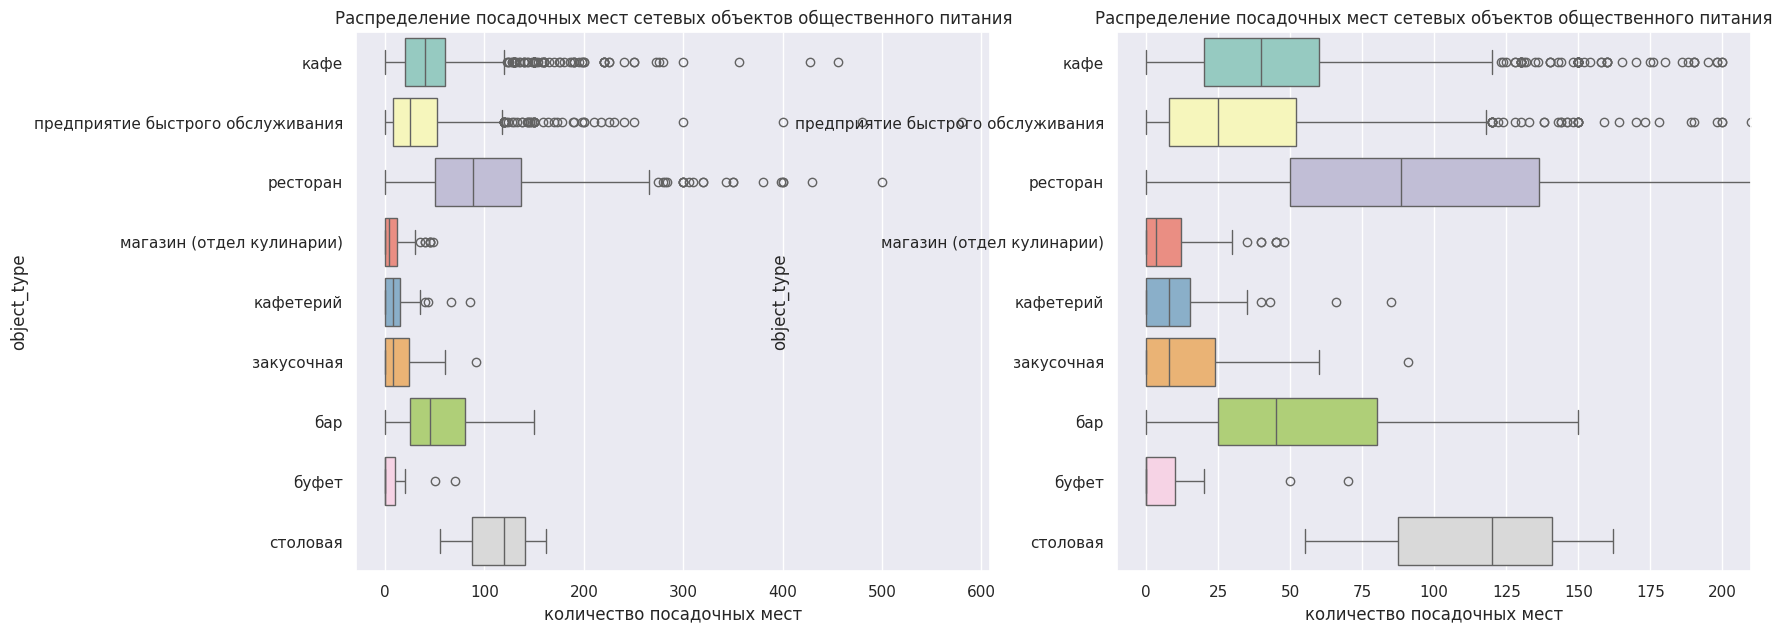

In [37]:
#выделим только сетевые предприятия
df_chain = df.query('chain == "сетевое"')

plt.figure(figsize=(18,7))

#график распределения посадочных мест в сетевых заведениях
plt.subplot(1, 2, 1)
ax = sns.boxplot(x='number', y='object_type', data=df_chain, palette="Set3")
ax.set_xlabel('количество посадочных мест')
ax.set_title('Распределение посадочных мест сетевых объектов общественного питания')

#то же в области ящика
plt.subplot(1, 2, 2)
ax = sns.boxplot(x='number', y='object_type', data=df_chain, palette="Set3")
ax.set_xlim(-10,210)
ax.set_xlabel('количество посадочных мест')
ax.set_title('Распределение посадочных мест сетевых объектов общественного питания')

plt.show()


На графике видно, что у сетевых объектов максимальное количество посадочных мест (до 600) -в ресторанах, объектах фастфуда и кафе: это крупные сети, которые могут себе позволить большие площади и не уйти в убыток. Но в основном такие заведения- это выбросы данных. Медианные значения говорят нам о том, что среднее количество посадочных мест максимально в сетевых столовых (около 120 посадочных мест) и ресторанах (85-90 посадочных мест).  

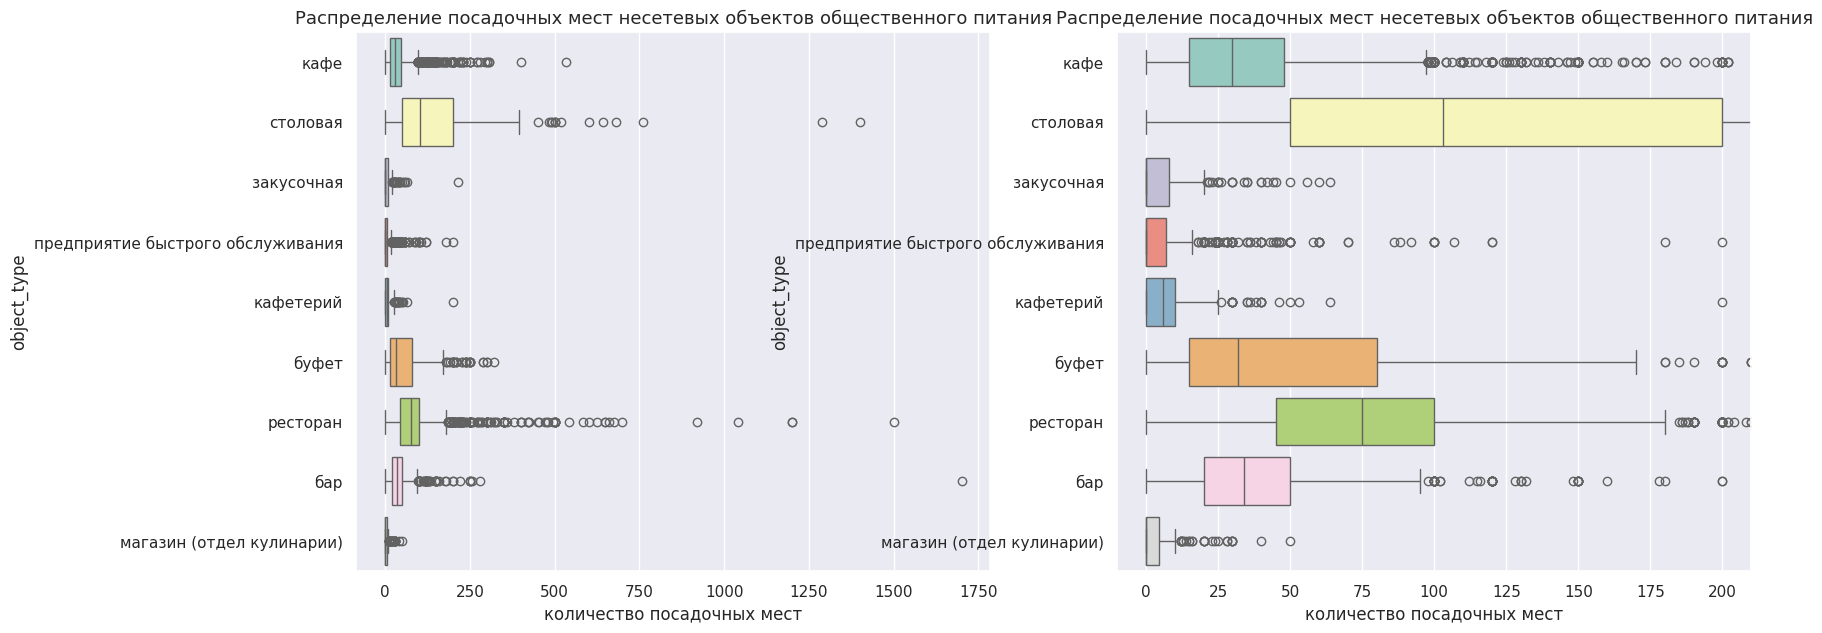

In [38]:
#выделим несетевые предприятия
df_non_chain = df.query('chain == "несетевое"')

plt.figure(figsize=(18,7))

#график распределения посадочных мест в несетевых заведениях
plt.subplot(1, 2, 1)
ax = sns.boxplot(x='number', y='object_type', data=df_non_chain, palette="Set3")
ax.set_xlabel('количество посадочных мест')
ax.set_title('Распределение посадочных мест несетевых объектов общественного питания', fontsize = 13)

#то же в области ящика
plt.subplot(1, 2, 2)
ax = sns.boxplot(x='number', y='object_type', data=df_non_chain, palette="Set3")
ax.set_xlim(-10,210)
ax.set_xlabel('количество посадочных мест')
ax.set_title('Распределение посадочных мест несетевых объектов общественного питания', fontsize = 13)

plt.show()


В несетовом сегменте заведений общественного питания максимальное количество посадочных мест -в ресторанах , столовых и барах. В несетевых заведениях максимальное количество посадочных мест достигает почти 1750 против 600 в сетевых. Такие выбросы - это концептуальные заведения, с хорошо разработанной стратегией развития (например ночной клуб на очень большой площади- территории бывшего завода и тп).  Если мы посмотрим на медианные значения, то будет видно, что наибольшее значение посадочных мест - у столовой (около 100 мест) и ресторанов (75 мест).

**Вывод**

Самое большое среднее количество посадочных мест в столовых и ресторанах.

Если смотреть подробнее, в разрезе категорий сетевого и несетевого заведения:

- У сетевых объектов максимальное количество посадочных мест (до 600) -в ресторанах, объектах фастфуда и кафе: это крупные сети, которые могут себе позволить большие площади и не уйти в убыток. Но в основном такие заведения- это выбросы данных. Медианные значения говорят нам о том, что среднее количество посадочных мест максимально в сетевых столовых (около 120 посадочных мест) и ресторанах (85-90 посадочных мест).

- В несетовом сегменте заведений общественного питания максимальное количество посадочных мест -в ресторанах , столовых и барах- максимальное количество посадочных мест достигает почти 1750 против 600 в сетевых. Такие выбросы - это концептуальные заведения, с хорошо разработанной стратегией развития (например ночной клуб на очень большой площади- территории бывшего завода и тп). Если мы посмотрим на медианные значения, то будет видно, что наибольшее значение посадочных мест - у столовой (около 100 мест) и ресторанов (75 мест).

Можно говорить о том, что у сетевого объекта по сравнению с несетевым того же типа есть тенденция к увеличению посадочных мест, что возможно связано с тем, что в сетевых брендах большая узнаваемость продукта и, соответственно, большая по сравнению с несетевыми заведениями популярность, это позволяет им расширять площади и количество посадочных мест. Но несетевые более склонны к значительным выбросам, превышающим аналогичные в сетевых более чем в 2 раза.


**Вывод по разделу 4**


Самая многочисленная категория для сетевых заведений - это сеть с небольшим количеством заведений и количеством посадочных мест более 20 и выше.

Подавляющее большинство заведений имеет максимум до 300 посадочных мест, с явно выраженным пиком в области от 0 (уличные заведения с едой только на вынос) до 50 мест.

Самое большое среднее количество посадочных мест в столовых и ресторанах.

Если смотреть подробнее, в разрезе категорий сетевого и несетевого заведения:

- У сетевых объектов максимальное количество посадочных мест (до 600) -в ресторанах, объектах фастфуда и кафе: это крупные сети, которые могут себе позволить большие площади и не уйти в убыток. Но в основном такие заведения- это выбросы данных. Медианные значения говорят нам о том, что среднее количество посадочных мест максимально в сетевых столовых (около 120 посадочных мест) и ресторанах (85-90 посадочных мест).

- В несетовом сегменте заведений общественного питания максимальное количество посадочных мест -в ресторанах , столовых и барах- максимальное количество посадочных мест достигает почти 1750 против 600 в сетевых. Такие выбросы - это концептуальные заведения, с хорошо разработанной стратегией развития (например ночной клуб на очень большой площади- территории бывшего завода и тп). Если мы посмотрим на медианные значения, то будет видно, что наибольшее значение посадочных мест - у столовой (около 100 мест) и ресторанов (75 мест).

Можно говорить о том, что у сетевого объекта по сравнению с несетевым того же типа есть тенденция к увеличению посадочных мест, что возможно связано с тем, что в сетевых брендах большая узнаваемость продукта и, соответственно, большая по сравнению с несетевыми заведениями популярность, это позволяет им расширять площади и количество посадочных мест. Но несетевые более склонны к значительным выбросам, превышающим аналогичные в сетевых более чем в 2 раза.


<a id="location5"></a>
# Анализ местонахождения объектов общественного питания


<a id="location51"></a>
## Топ-10 улиц по количеству объектов общественного питания.

Найдем улицы с максимальным количеством объектов общественного питания, и выделим топ-10 из них:

In [39]:
# топ-10 улиц по количеству объектов общественного питания. уберем Зеленоград и поселение Cосенское-
#их улицы не войдут в топ, и рассматривать их мы не будем
top_street = (
    df.query('streetname != "город Зеленоград" and streetname != "поселение Сосенское" ')
    .groupby('streetname')['id'].count().sort_values(ascending=False).head(10)
     )
top_street = top_street.reset_index()
top_street.columns = ['streetname', 'count_objects']
top_street

,streetname,count_objects
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


from matplotlib import pyplot as plt
_df_2['count_objects'].plot(kind='hist', bins=20, title='count_objects')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['count_objects'].plot(kind='line', figsize=(8, 4), title='count_objects')
plt.gca().spines[['top', 'right']].set_visible(False)

Визуализируем результат:

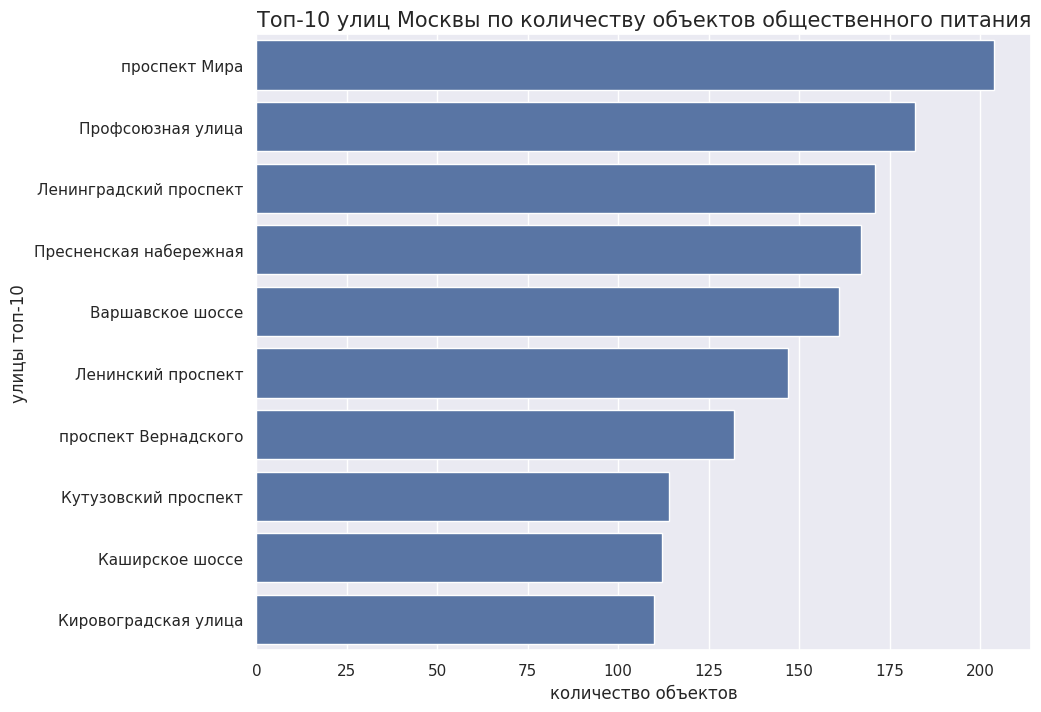

In [40]:
ax = sns.barplot(y ='streetname', x='count_objects', data= top_street)
ax.set_ylabel('улицы топ-10')
ax.set_xlabel('количество объектов')
ax.set_title('Топ-10 улиц Москвы по количеству объектов общественного питания', fontsize = 15)

plt.show()

Наибольшее количество объектов общепита находится на проспекте Мира и Профсоюзной улице.

Из внешнего источника загрузим данные о принадлежности адреса к району и округу и сохраним их в переменной  streets:

In [41]:
spreadsheet_id = '1HNm31C4_VP02tXKAY4Vf_9KZ2-OuMgT4Ggm1-Sdy__4'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r=requests.get(file_name)
streets = pd.read_csv(BytesIO(r.content))
streets.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


Добавим полученные данные к улицам из списка топ-10:

In [42]:
top_street = top_street.merge(streets[['streetname','okrug', 'area']], how='left', on='streetname')
top_street

,streetname,count_objects,okrug,area
0,проспект Мира,204,СВАО,Алексеевский район
1,проспект Мира,204,СВАО,Ярославский Район
2,проспект Мира,204,СВАО,Район Марьина роща
3,проспект Мира,204,СВАО,Останкинский район
4,проспект Мира,204,СВАО,Район Ростокино
5,проспект Мира,204,СВАО,Район Свиблово
6,проспект Мира,204,ЦАО,Мещанский район
7,Профсоюзная улица,182,ЮЗАО,Академический район
8,Профсоюзная улица,182,ЮЗАО,Район Черемушки
9,Профсоюзная улица,182,ЮЗАО,Район Ясенево


Мы видим, что одна улица проходит по нескольким районам и округам города. Данный факт лишь косвенно может указывать на возможную плотность объектов общепита, т.к. мы ничего не знаем в какой именно части улицы они сконцентрированы.

По имеющимся данным мы можем сгруппировать округи и районы, по которым проходили улицы из списка топ-10, по количеству и посмотреть какой из них оказался более популярен и проходит по максимальному количеству улиц топ-10:

In [43]:
#группируем по округу
display(top_street.groupby('okrug')['okrug'].count().sort_values(ascending=False))

,okrug
okrug,
ЮАО,14
ЮЗАО,14
ЗАО,7
СВАО,6
САО,4
ЦАО,3


In [44]:
#группируем по району
display(top_street.groupby('area')['area'].count().sort_values(ascending=False))

,area
area,
Донской район,2
Ломоносовский район,2
Район Проспект Вернадского,2
Район Гагаринский,2
Обручевский район,2
Район Чертаново Южное,2
Район Чертаново Центральное,2
Район Теплый Стан,2
Район Нагатино-Садовники,2


Как видно, эта информация также не очень нам помогла: интуитивно понятно, что центр -более предпочтителен для размещения общепита, т.к. располагает большей проходимостью как следствием размещения большого количества офисов, транспортной логистики, потока гостей столицы.

Как альтернативный вариант можно было бы также рассматривать улицы, проходящие в больших спальных районах, но все эти  факторы невозможно точно определить только по наименованию района города. Мы можем только констатировать выявленные факты, а именно:

- Выделенные нами в топ-10 улицы (проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица)	по количеству объектов общепита чаще всего проходили через ЮЗАО и ЮАО.
- Возможно заслуживают внимания районы, через которые проходили эти улицы более 1 раза (Районы Теплый Стан, Нагатино-Садовники, Донской район, Ломоносовский район, Чертаново, Гагаринский, Тропарево-Никулино, Проспект Вернадского, Обручевский район)           

**Вывод**

Топ-10 улиц по количеству объектов общепита :проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица.

Наибольшее количество объектов общепита находится на проспекте Мира и Профсоюзной улице.


Чаще всего эти улицы из топ-10 проходили через ЮЗАО и ЮАО.

Районы, через которые улицы из топ-10 проходили более 1 раза: Районы Теплый Стан, Нагатино-Садовники, Донской район, Ломоносовский район, Чертаново, Гагаринский, Тропарево-Никулино, Проспект Вернадского, Обручевский район


<a id="location52"></a>
## Улицы с одним объектом общественного питания

Найдем улицы с одним объектом общественного питания:

In [45]:
# находим улицы с одним объектом общественного питания
one_street = (
    df.groupby('streetname')['id'].count().sort_values(ascending=True)
     )
one_street = one_street.reset_index()
one_street.columns = ['streetname', 'count_objects']
one_street = one_street.query('count_objects == 1')
display(one_street.head())
print(one_street.shape)

,streetname,count_objects
0,1-й Котельнический переулок,1
1,1-й Коптельский переулок,1
2,1-й Кожуховский проезд,1
3,1-й Кожевнический переулок,1
4,1-й Кирпичный переулок,1


(579, 2)


Всего найдено 579 улиц с одним объектом общепита.

Добавим к ним информацию о районах и округах, через которые они проходят:

In [48]:
#добавляем информацию об округе и районе, в которых находится улица
one_street = one_street.merge(streets[['streetname','okrug', 'area']], how='left', on='streetname')
one_street

,streetname,count_objects,okrug_x,area_x,okrug_y,area_y
0,1-й Котельнический переулок,1,ЦАО,Таганский район,ЦАО,Таганский район
1,1-й Коптельский переулок,1,ЦАО,Красносельский район,ЦАО,Красносельский район
2,1-й Коптельский переулок,1,ЦАО,Красносельский район,ЦАО,Мещанский район
3,1-й Коптельский переулок,1,ЦАО,Мещанский район,ЦАО,Красносельский район
4,1-й Коптельский переулок,1,ЦАО,Мещанский район,ЦАО,Мещанский район
...,...,...,...,...,...,...
711,улица Уткина,1,ВАО,Район Соколиная Гора,ВАО,Район Соколиная Гора
712,1-й Сельскохозяйственный проезд,1,СВАО,Район Ростокино,СВАО,Район Ростокино
713,улица Шумилова,1,ЮВАО,Район Кузьминки,ЮВАО,Район Кузьминки
714,улица Шумкина,1,ВАО,Район Сокольники,ВАО,Район Сокольники


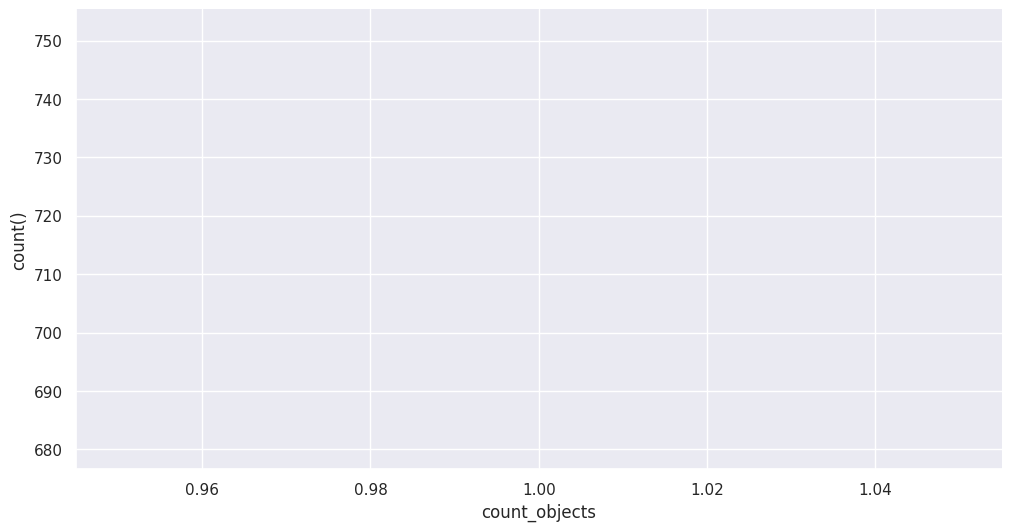

In [50]:
# @title count_objects vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['count_objects']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'count_objects'}, axis=1)
              .sort_values('count_objects', ascending=True))
  xs = counted['count_objects']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = one_street.sort_values('count_objects', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count_objects')
_ = plt.ylabel('count()')

Посмотрим какой район вышел в топ по количеству улиц с одним заведением общепита:

In [54]:
#строим столбчатую диаграмму по количеству улиц в районах
(
    one_street.groupby('okrug')['streetname']
    .count().reset_index()
    .sort_values(by='streetname', ascending=False)
    .rename(columns={'streetname':'count_streets'}
    ).plot.bar(
        x='okrug', y='count_streets', rot=45,
        title='Улицы с одним объектом общественного питания ',
         figsize=(8,6)
    ).set(xlabel='округ', ylabel='количество улиц'))
plt.show()


KeyError: 'ocrug'

Наибольшее количество улиц с одним объектом общепита- в Центральном административном округе. Посмотрим на районы ЦАО:

In [53]:
#строим столбчатую диаграмму по ЦАО в разрезе районов:
(
one_street.query('okrug == "ЦАО"')
    .groupby('area')['streetname']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'streetname':'count_streets'})
     ).plot.bar( x='area', y='count_streets', rot=45,
            title='Улицы с одним объектом общественного питания в ЦАО ',
            figsize=(8,6)).set(
            xlabel='район', ylabel='количество улиц');
plt.show()
(
one_street.query('okrug == "ЦАО"')
    .groupby('area')['streetname']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'streetname':'count_streets'})
     )

UndefinedVariableError: name 'okrug' is not defined

Максимальное количество улиц с одним объектом- в Таганском районе (27 улиц/объектов), Хамовниках и Басманном районе.

**Вывод**

Всего в Москве 579 улиц с одним объектом общепита. При этом более 180 из них находятся в ЦАО. Максимальное количество таких улиц Центрального администранивного округа- в Таганском районе, Хамовниках и Басманном районе.


<a id="location53"></a>
## Распределение количества посадочных мест

<a id="location531"></a>
### для улиц с большим количеством объектов общественного питания

Сохраним в переменной top_details объекты , находящиеся на улицах из списка топ-10:

In [55]:
top = top_street['streetname']
top_details =df.query('streetname in @top')
print(top_details.shape)
display(top_details.head())

(1500, 7)


,id,object_name,chain,object_type,address,number,streetname
151,155973,кафе андерсон,сетевое,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,кафе subway,сетевое,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,кафе ламаджо,несетевое,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,шаурма в пите,несетевое,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,выпечка,несетевое,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе


Общее распределение количества мест на улицах топ-10:

count   1,500.00
mean       58.02
std        90.06
min         0.00
25%        12.00
50%        40.00
75%        75.00
max     1,700.00
Name: number, dtype: float64


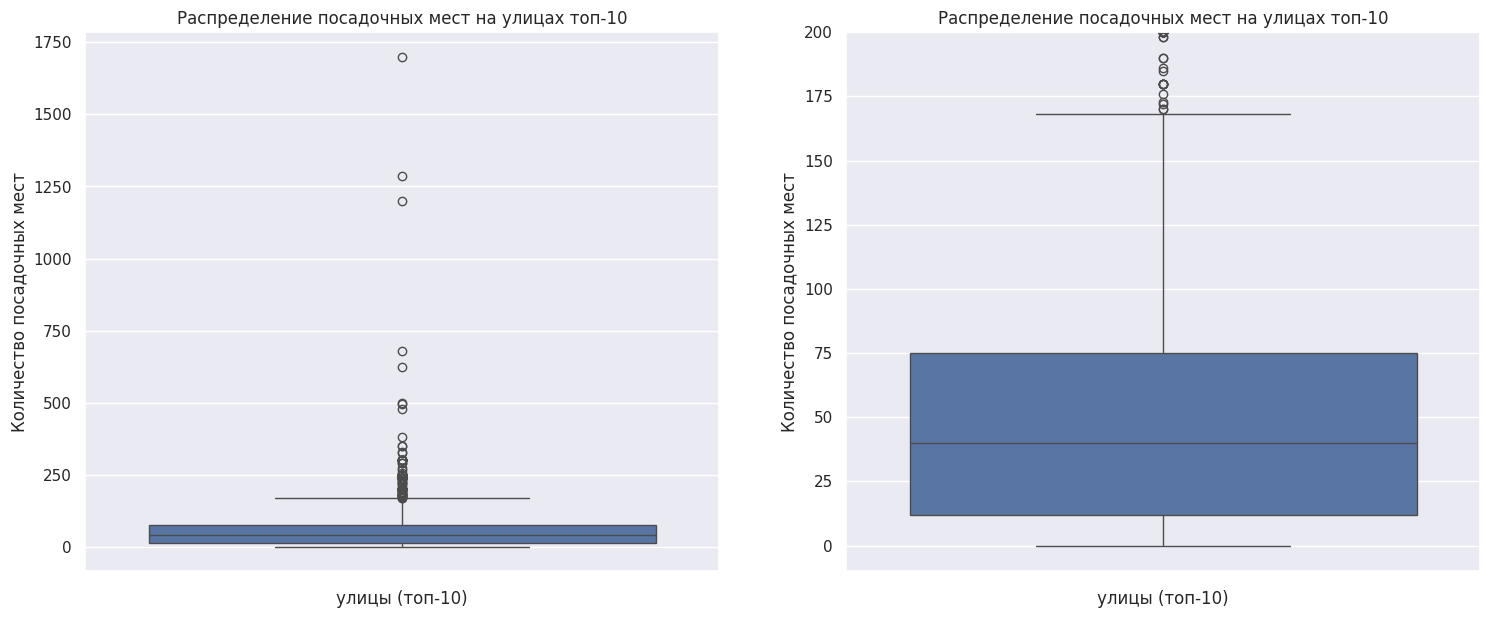

In [56]:
print(top_details['number'].describe())
#диаграмма разброса

plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1)
ax = sns.boxplot( y='number', data=top_details)
ax.set_xlabel('улицы (топ-10)')
ax.set_ylabel('Количество посадочных мест')
ax.set_title('Распределение посадочных мест на улицах топ-10')

plt.subplot(1, 2, 2)
ax = sns.boxplot( y='number', data=top_details)
ax.set_xlabel('улицы (топ-10)')
ax.set_ylabel('Количество посадочных мест')
ax.set_title('Распределение посадочных мест на улицах топ-10')
ax.set_ylim(-10, 200)
plt.show()


Для улиц из топ-10 - 75% всех заведений располагают до 75 посадочных мест, медианное значение -40 мест.

Визуализируем распределение посадочных мест в разрезе улиц:

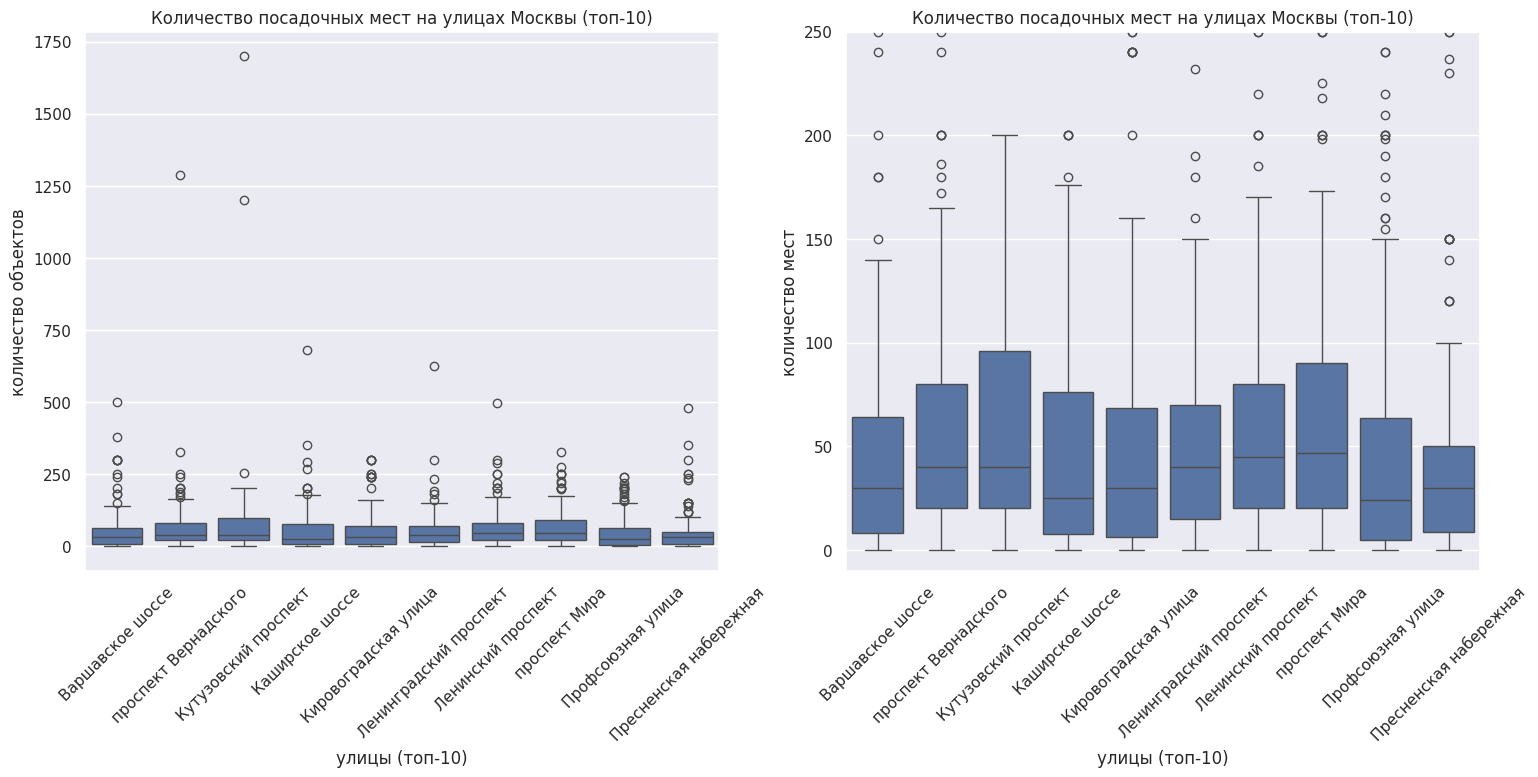

In [57]:
plt.figure(figsize=(18,7))

#график распределения посадочных мест на улицах топ-10
plt.subplot(1, 2, 1)
ax = sns.boxplot(x='streetname', y='number', data=top_details)
ax.set_xlabel('улицы (топ-10)')
ax.set_ylabel('количество объектов')
ax.set_title('Количество посадочных мест на улицах Москвы (топ-10)')
plt.xticks(rotation=45)

#то же, область межквартильного размаха
plt.subplot(1, 2, 2)
ax =sns.boxplot(x='streetname', y='number', data=top_details)
ax.set_xlabel('улицы (топ-10)')
ax.set_ylabel('количество мест')
ax.set_title('Количество посадочных мест на улицах Москвы (топ-10)')
plt.xticks(rotation=45)
ax.set_ylim(-10, 250)

plt.show()

Для улиц из топ-10 - 75% всех заведений располагают до 75 посадочных мест, медианное значение -40 мест.Но это "средняя температура в целом по больнице".

При детальном рассмотрении 75% объектов не превышают границы в 100 посадочных мест, а медиана максимальна на проспекте Мира (49 посадочных мест) и минимальна на Профсоюзной улице (около 20 мест).

Крупные выбросы (500-100 посадочных мест) единичны, все данные лежат в диапазоне до 400 мест.

<a id="location532"></a>
### для улиц с одним объектом общественного питания

Для полноты картины посмотрим распределение посадочных мест на улицах с одним заведением общепита: сделаем выборку и построим боксплот:

In [58]:
one = one_street['streetname']

one_details =df.query('streetname in @one')
print(one_details.shape)
display(one_details.head())

(579, 7)


,id,object_name,chain,object_type,address,number,streetname
19,153644,американская лаборатория десертов,несетевое,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок
61,21214,столовая,несетевое,столовая,"город Москва, Бабаевская улица, дом 3",90,Бабаевская улица
69,22139,хуанхэ,несетевое,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок
81,25833,азербайджан,несетевое,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного
131,150881,вгик,несетевое,столовая,"город Москва, Будайская улица, дом 3",45,Будайская улица


count   579.00
mean    80.77 
std     74.83 
min     0.00  
25%     30.00 
50%     50.00 
75%     102.50
max     456.00
Name: number, dtype: float64


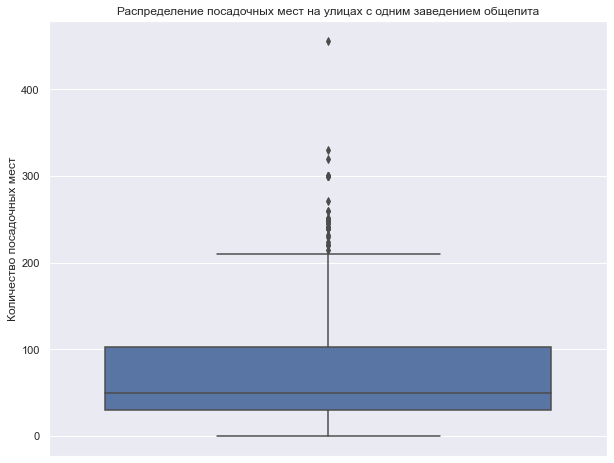

In [ ]:
print(one_details['number'].describe())

#диаграмма разброса
sns.boxplot( y='number', data=one_details)
plt.ylabel('Количество посадочных мест')
plt.title('Распределение посадочных мест на улицах с одним заведением общепита')
plt.show()

Для улиц с одним объектом общепита- 75% всех заведений располагают до 102 посадочных мест, медианное значение -50 мест.

**Вывод**

Для улиц из топ-10 - 75% всех заведений располагают до 75 посадочных мест, медианное значение -40 мест.Но это "средняя температура в целом по больнице".

При детальном рассмотрении 75% объектов не превышают границы в 100 посадочных мест, а медиана максимальна на проспекте Мира (49 посадочных мест) и минимальна на Профсоюзной улице (около 20 мест).

Крупные выбросы (500-100 посадочных мест) единичны, все данные лежат в диапазоне до 400 мест.


Для улиц с одним объектом общепита значения примерно те же - 75% заведений -до 102 посадочных мест и медианное значение в 50.

**Вывод по разделу 5**

Топ-10 улиц по количеству объектов общепита :проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица.

Наибольшее количество объектов общепита находится на проспекте Мира и Профсоюзной улице.

Чаще всего эти улицы из топ-10 проходили через ЮЗАО и ЮАО.

Районы, через которые улицы из топ-10 проходили более 1 раза: Районы Теплый Стан, Нагатино-Садовники, Донской район, Ломоносовский район, Чертаново, Гагаринский, Тропарево-Никулино, Проспект Вернадского, Обручевский район

Всего в Москве 579 улиц с одним объектом общепита. При этом более 180 из них находятся в ЦАО. Максимальное количество таких улиц Центрального администранивного округа- в Таганском районе, Хамовниках и Басманном районе.

Для улиц из топ-10 - 75% всех заведений располагают до 75 посадочных мест, медианное значение -40 мест.Но это "средняя температура в целом по больнице".

При детальном рассмотрении 75% объектов не превышают границы в 100 посадочных мест, а медиана максимальна на проспекте Мира (49 посадочных мест) и минимальна на Профсоюзной улице (около 20 мест).


Для улиц с одним объектом общепита значения примерно те же - 75% заведений -до 102 посадочных мест и медианное значение в 50.